In [2]:
import sys
import pandas as pd

In [3]:
!{sys.executable} -m pip install geopy --user

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
from geopy.geocoders import Nominatim
import geopy
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
playgrounds = pd.read_csv("https://data.wprdc.org/dataset/640add54-b0e1-4abb-a232-f5092b243ee0/resource/40097711-aa25-47d9-b0fb-920cace3afa0/download/opendata-pubworks-play-area-listing-2015.csv")
playgrounds2 = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
#playgrounds.head()
landslides = pd.read_csv("https://data.wprdc.org/dataset/7db7daf4-1fcc-4ad6-ad5e-6ed21a45b154/resource/dde1f413-c849-413c-b791-0f861bf219ce/download/globallandslides.csv")
#landslides.head()
internetproviders = pd.read_csv("https://data.wprdc.org/dataset/ae1f7cda-5e15-4a8a-a5b2-2e4803f1500a/resource/c2df1e6f-5563-4e53-9de8-b0e4c7d2cb93/download/pittsburghispsbyblock.csv")
steps = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64")


In [6]:
playground_series = playgrounds.groupby("Neighborhood").count().loc[:,"Play area name"].sort_values(ascending=False)
playground_series[:10]

Neighborhood
Squirrel Hill South    9
Southside Slopes       5
Beechview              5
Allegheny Center       4
Hazelwood              4
Highland Park          4
Sheraden               4
Manchester             3
Beltzhoover            3
Upper Lawrenceville    3
Name: Play area name, dtype: int64

In [7]:
playgrounds2.groupby("neighborhood").count().loc[:,'id'].sort_values(ascending=False)[:10]

neighborhood
Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Allegheny Center       4
Highland Park          4
Sheraden               4
South Oakland          3
Beltzhoover            3
Carrick                3
Hazelwood              3
Name: id, dtype: int64

In [8]:
pgh_landslides = landslides.groupby('ev_id').filter(lambda x: x['gaz_point'] == 'Pittsburgh')
pgh_landslides.head()

,src_name,src_link,ev_id,ev_date,ev_time,ev_title,ev_desc,loc_desc,loc_accu,ls_cat,...,ev_imp_id,latitude,longitude,ctry_name,ctry_code,div_name,gaz_point,gaz_dist,sub_date,edit_date
270,www.post-gazette.com,http://www.post-gazette.com/stories/local/neig...,"4,724",2013-01-17,NaN,"Merrimac Street To Saw Mill Run, Pittsburgh, Pa",A mudslide has closed Woodruff Street from Mer...,"Merrimac Street To Saw Mill Run, Pittsburgh, Pa",5km,mudslide,...,4724.0,40.423900,-80.018100,United States,US,Pennsylvania,Pittsburgh,8.31,2014-04-01,2018-06-23
836,Channel 11 News WPXI,http://www.wpxi.com/news/rock-slide-closes-all...,"10,266",2017-01-24,unknown,"Allegheny River Boulevard Rock Slide, between ...",There has been at least a trace of rainfall in...,"PA-130, Verona, Pennsylvania, 15147",1km,rock_fall,...,NaN,40.483442,-79.864762,United States,US,Pennsylvania,Pittsburgh,11.31,2017-10-20,2018-06-23
1748,CBS Pittsburgh,http://pittsburgh.cbslocal.com/2017/02/11/rock...,"10,259",2017-02-11,unknown,Saxonburg Boulevard Rock Fall in 900 block,Vehicles were forced to veer around a large ch...,"900 Saxonburg Blvd, Cheswick, Pennsylvania, 15024",exact,rock_fall,...,NaN,40.623644,-79.865525,United States,US,Pennsylvania,Pittsburgh,17.94,2017-10-20,2018-06-23
1756,TRIBLIVE,http://triblive.com/news/adminpage/7978986-74/...,"6,875",2015-03-15,13:00,Allegheny River Boulevard near the Highland Pa...,The slide occurred at about 1:30 p.m. on the o...,Allegheny River Boulevard near the Highland Pa...,1km,other,...,6875.0,40.483600,-79.904300,United States,US,Pennsylvania,Pittsburgh,8.00,2015-05-29,2018-06-23
1904,post-gazette,http://www.post-gazette.com/stories/local/neig...,"4,606",2012-11-02,NaN,"West Carson Street, Pittsburgh, PA",An overnight landslide near the city's West En...,"West Carson Street, Pittsburgh, PA",5km,landslide,...,4606.0,40.447900,-80.030900,United States,US,Pennsylvania,Pittsburgh,6.16,2014-04-01,2018-06-23


In [9]:
landslides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11337 entries, 0 to 11336
Data columns (total 29 columns):
src_name      11337 non-null object
src_link      10529 non-null object
ev_id         11337 non-null object
ev_date       11337 non-null object
ev_time       5158 non-null object
ev_title      11336 non-null object
ev_desc       10473 non-null object
loc_desc      11237 non-null object
loc_accu      11335 non-null object
ls_cat        11335 non-null object
ls_trig       11304 non-null object
ls_size       11327 non-null object
ls_setting    11258 non-null object
fatalities    11337 non-null object
injuries      11337 non-null int64
storm_name    576 non-null object
photo_link    1672 non-null object
comments      364 non-null object
ev_imp_src    11337 non-null object
ev_imp_id     9469 non-null float64
latitude      11337 non-null float64
longitude     11337 non-null float64
ctry_name     11297 non-null object
ctry_code     11295 non-null object
div_name      11297 non-null obj

In [9]:
pgh_landslides.loc[:1000,'latitude':'longitude']

,latitude,longitude
270,40.423900,-80.018100
836,40.483442,-79.864762


In [11]:
locations = pgh_landslides.loc[:,'latitude':'longitude'].to_string(index=False,index_names=False)
locations = [x.replace(' ', ', ') for x in locations.split("\n")[1:]]
locations[:5]

['40.423900, -80.018100',
 '40.483442, -79.864762',
 '40.623644, -79.865525',
 '40.483600, -79.904300',
 '40.447900, -80.030900']

In [12]:
# https://stackoverflow.com/questions/34984044/how-to-reverse-geocode-lat-lon-into-boroughs-efficiently
# always cite your sources

geolocator = Nominatim(user_agent="cmpinf0999-bdr")

neighborhoods = []
for loc in locations:
    response = str(geolocator.reverse(loc))
    #print(response)
    info = response.split(', ')
    if len(info[0]) == 4 or len(info[0]) == 3:
        neighborhoods.append(info[2])
    else:
        neighborhoods.append(info[max(info.index("Allegheny County") - 2,1)])
neighborhoods[:5]

['Mount Washington',
 'Nadine',
 'West Deer Township',
 'Lincoln-Lemington',
 'Elliott']

In [13]:
pd.Series(neighborhoods).value_counts().head()

Mount Washington    9
Nadine              3
Duquesne Heights    3
Elliott             2
South Shore         2
dtype: int64

In [14]:
landslides.head()

,src_name,src_link,ev_id,ev_date,ev_time,ev_title,ev_desc,loc_desc,loc_accu,ls_cat,...,ev_imp_id,latitude,longitude,ctry_name,ctry_code,div_name,gaz_point,gaz_dist,sub_date,edit_date
0,Oregon DOT,NaN,"8,840",2011-01-16,16:00,"OR 218, milepost 34.9",NaN,"OR 218, milepost 34.9",exact,landslide,...,8840.0,44.9184,-120.2668,United States,US,Oregon,Kinzua,18.34,2016-07-08,2018-06-23
1,www.itv.com,http://www.itv.com/news/westcountry/2013-12-30...,"5,725",2013-12-25,NaN,"Calstock, Cornwall",The Army is on standby to help residents in Ca...,"Calstock, Cornwall",1km,landslide,...,5725.0,50.4972,-4.2100,United Kingdom,GB,England,Plymouth,10.57,2014-04-01,2018-06-23
2,business-standard,http://www.business-standard.com/generalnews/n...,"4,343",2012-05-01,14:00,"Shennongjia, Hubei",More than 300 tourists were evacuated after a ...,"Shennongjia, Hubei",25km,landslide,...,4343.0,31.7501,110.6807,China,CN,Hubei,Nan He,13.49,2014-04-01,2018-06-23
3,The Statesman,http://www.thestatesman.com/news/northeast/lan...,"6,964",2015-06-17,NaN,"National Highway 31A, Darjeeling Hills","Note: one article listed multiple landslides, ...","National Highway 31A, Darjeeling Hills",50km,landslide,...,6964.0,27.0087,88.4430,India,IN,West Bengal,Kalimpong,8.03,2015-06-25,2018-06-23
4,pia,http://www.pia.gov.ph/?m=12&fi=p080104.htm&no=10,408,2008-01-03,NaN,Pancho Villa and Kahupian villages in Sogod,very little information on the hazard,Pancho Villa and Kahupian villages in Sogod,25km,landslide,...,408.0,10.3904,124.9851,Philippines,PH,Southern Leyte,Sogod,0.07,2014-04-01,2018-06-23


In [92]:
steps.groupby("neighborhood").sum()['number_of_steps'].sort_values(ascending=False)[:10]

#steps.head()

neighborhood
South Side Slopes     3666.0
Beechview             2400.0
Perry South           1798.0
Hazelwood             1373.0
Greenfield            1305.0
Marshall-Shadeland    1210.0
Troy Hill             1115.0
Brookline             1114.0
Fineview              1110.0
Mount Washington      1087.0
Name: number_of_steps, dtype: float64

In [82]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 25 columns):
id                            854 non-null int64
name                          854 non-null object
maintenance_responsibility    853 non-null object
installed                     448 non-null object
material                      849 non-null object
length                        851 non-null float64
number_of_steps               608 non-null float64
schools_count                 555 non-null float64
school_score                  555 non-null float64
total_population              555 non-null float64
transit_rider_count           555 non-null float64
transit_score                 555 non-null float64
detour_score                  555 non-null float64
overall_score                 555 non-null float64
image                         853 non-null object
neighborhood                  854 non-null object
council_district              853 non-null float64
ward                          854 no

In [111]:
internetproviders.groupby('Neighborhood').mean().loc[:,'MaxAdDown':'MaxAdUp'].sort_values('MaxAdDown',ascending=False)

,MaxAdDown,MaxAdUp
Neighborhood,,
Lincoln Place,43.821479,17.558879
Stanton Heights,43.612676,17.286239
Regent Square,42.503891,17.219315
Beltzhoover,42.492981,16.600726
Upper Hill,42.388158,17.190842
Garfield,42.358833,16.964587
Brookline,41.893326,16.314020
Overbrook,41.767503,16.566843
Crafton Heights,41.098558,16.177481


In [17]:
internetproviders.groupby('Neighborhood').max().loc[:,'MaxAdDown':'MaxAdUp'].sort_values('MaxAdDown',ascending=False)

,MaxAdDown,MaxAdUp
Neighborhood,,
Northview Heights,400.0,100.0
Squirrel Hill South,400.0,100.0
Allegheny Center,150.0,100.0
Regent Square,150.0,100.0
Polish Hill,150.0,100.0
Point Breeze North,150.0,100.0
Point Breeze,150.0,100.0
Perry South,150.0,100.0
Perry North,150.0,100.0


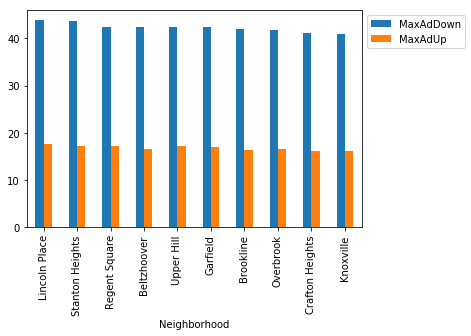

In [25]:
internetproviders.groupby('Neighborhood').mean().loc[:,'MaxAdDown':'MaxAdUp'].sort_values("MaxAdDown",ascending=False).iloc[:10].plot(kind="bar")
plt.legend(bbox_to_anchor=(1,1));

No handles with labels found to put in legend.


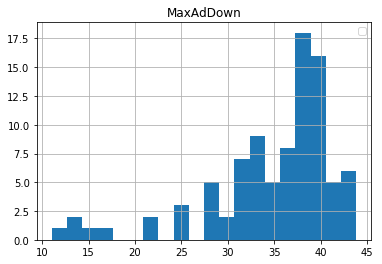

In [34]:
internetproviders.groupby('Neighborhood').mean().loc[:,'MaxAdDown':'MaxAdDown'].sort_values("MaxAdDown",ascending=False).iloc[:].hist(bins=20)
plt.legend(bbox_to_anchor=(1,1));